In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import random
import os
import urllib.request  # fetch images from an url


from IPython.display import display, HTML, Markdown  # exclusive for jupyter notebook
from tqdm import tqdm  # Very cool progress bar :D
from typing import List, Tuple  # Explicit type, better explanation of the arguments without comments
from collections import Counter

from sklearn import preprocessing

In [2]:
plt.style.use('seaborn')

def display_markdown(*args, **kargs):
    display(Markdown(*args, **kargs))

In [3]:
fname = 'a943287.csv'
df = pd.read_csv(fname)
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_select_the_gender_of_the_person_in_the_picture,please_select_the_gender_of_the_person_in_the_picture:confidence,image_url,please_select_the_gender_of_the_person_in_the_picture_gold,user_id
0,1023132475,False,finalized,1,8/19/2016 17:00:25,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/40...,NaN,40
1,1023132476,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/42...,NaN,42
2,1023132477,False,finalized,1,8/19/2016 17:01:43,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/44...,NaN,44
3,1023132478,False,finalized,1,8/19/2016 17:01:04,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/47...,NaN,47
4,1023132479,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/50...,NaN,50


In [4]:
print(df.shape)
df = df[df.please_select_the_gender_of_the_person_in_the_picture != 'unsure']
print(df.shape)

(64084, 10)
(54962, 10)


In [5]:
X = df['image_url'].values
y = np.array(df['please_select_the_gender_of_the_person_in_the_picture'].values)

X[:5], y[:5]

(array(['https://d1qb2nb5cznatu.cloudfront.net/users/40-large',
        'https://d1qb2nb5cznatu.cloudfront.net/users/42-large',
        'https://d1qb2nb5cznatu.cloudfront.net/users/44-large',
        'https://d1qb2nb5cznatu.cloudfront.net/users/47-large',
        'https://d1qb2nb5cznatu.cloudfront.net/users/50-large'],
       dtype=object),
 array(['male', 'male', 'male', 'male', 'male'], dtype=object))

In [6]:

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X[:5], y[:5]

(array(['https://d1qb2nb5cznatu.cloudfront.net/users/40-large',
        'https://d1qb2nb5cznatu.cloudfront.net/users/42-large',
        'https://d1qb2nb5cznatu.cloudfront.net/users/44-large',
        'https://d1qb2nb5cznatu.cloudfront.net/users/47-large',
        'https://d1qb2nb5cznatu.cloudfront.net/users/50-large'],
       dtype=object), array([1, 1, 1, 1, 1]))

In [7]:
le.inverse_transform(y)

array(['male', 'male', 'male', ..., 'male', 'male', 'male'], dtype=object)

In [8]:

def make_dir(folder: str) -> None:
    if not os.path.exists(folder):
        os.mkdir(folder)

def save_img(img_url: str, filepath: str) -> None:
    try:
        with urllib.request.urlopen(img_url) as url:
            s = url.read()
    except urllib.error.HTTPError:
        print('Image not found or no internet connection')
        return  # image not found
    with open(filepath, 'wb') as f:
        f.write(s)



In [21]:
def download_males_females(urls: List[str], labels: List[int], n: int, seed=None) -> None:
    counter = Counter(labels)
    n = min(min(counter[0], counter[1]), n)
    indexes = list(range(len(labels)))
    male_indexes = []
    female_indexes = []
    random.shuffle(indexes)
    i = 0
    while len(male_indexes) < n and len(female_indexes) < n:  # TODO: use counters
        male_indexes.append(i) if labels[i] == MALE_LABEL else female_indexes.append(i)
        i += 1
    for gender_indexes, gender_label in ((male_indexes, MALE_LABEL), (female_indexes, FEMALE_LABEL)):
        while len(gender_indexes) < n:  # while executed once
            if labels[i] == gender_label: 
                gender_indexes.append(i)
            i += 1
    for i, j in zip(male_indexes, female_indexes):
        print(f'{i}/{len(male_indexes)}')
        save_img(urls[i], os.path.join('img', 'male', f'{i}.jpg'))
        save_img(urls[j], os.path.join('img', 'female', f'{j}.jpg'))
 




0/25
1/25
2/25
3/25
4/25
Image not found or no internet connection
5/25
6/25
7/25
8/25
9/25
10/25
11/25
12/25
13/25
14/25
16/25
17/25
18/25
19/25
20/25
21/25
22/25
23/25
24/25
25/25


In [ ]:
MALE_PATH = os.path.join('img', 'male')
FEMALE_PATH = os.path.join('img', 'female')

def set_local_dataset(url_list: List[str], labels: List[int], n: int) -> bool:
    if os.path.exists('img')  \
            and len(os.listdir(os.path.join('img', 'male'))) < n  \
            and len(os.listdir(os.path.join('img', 'female'))) < n:
        return
    make_dir('img')
    make_dir(os.path.join('img', 'male'))
    make_dir(os.path.join('img', 'female'))
    MALE_LABEL = 1
    FEMALE_LABEL = 0
    download_males_females(url_list, labels, n)
        

set_local_dataset(X, y, 25)

In [39]:

img = cv2.imread(os.path.join('img', 'male', '0.jpg'))

print(img.shape)



(300, 300, 3)


(49, 300, 300, 3) (49,)


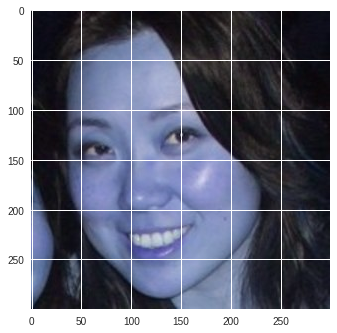

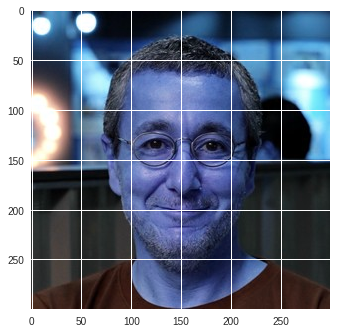

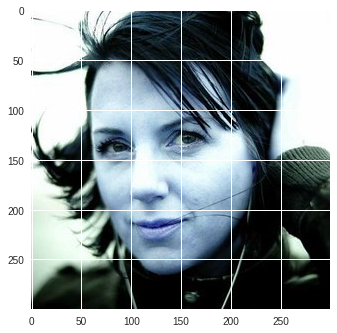

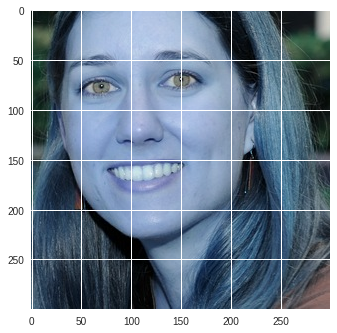

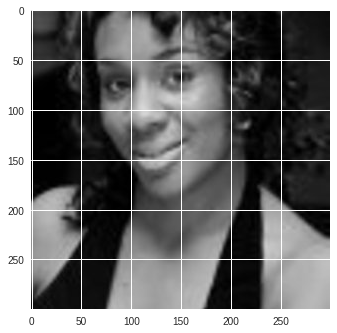

In [53]:


def gender_imgs(gender: str) -> List[np.array]:
    subdirpath = os.path.join('img', gender)
    return [cv2.imread(os.path.join(subdirpath, bname)) 
            for bname in os.listdir(subdirpath)]

def get_dataset():
    males = gender_imgs('male')
    females = gender_imgs('female')
    X = females
    y = [0 for _ in females]
    X += males
    y += [1 for _ in males]
    return np.array(X), np.array(y)


X, y = get_dataset()
print(X.shape, y.shape)

for img_arr in random.sample(list(X), 5):
    plt.imshow(img_arr)
    plt.show()



(49, 300, 300, 3) (49,)


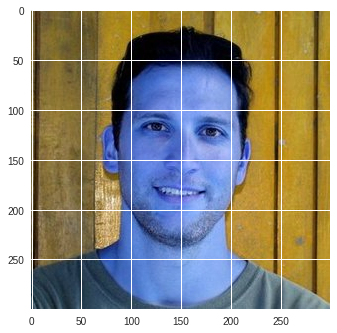

In [74]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


print(X.shape, y.shape)  # index, i, j, rgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#  normalize the data between 0-1
X_train = X_train / 255  
X_test = X_test / 255



In [75]:
# build the CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


model = Sequential()
